## SHUBHAM SHARMA
### 18$i$190002
### IIT BOMBAY
This file contains network architecture design for two outputs and the a single input. The single input being the region image and the 1st output being  weather that image is foregrounda or background. The second architecture or the second part of  the architecture thries to classify between different classes and none of the classes

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
#Importing packages
from skimage import io
import pandas as pd
from matplotlib import pyplot as plt
# import selectivesearch
import cv2
from tqdm import tqdm
import requests
import urllib
import numpy as np
import selectivesearch

In [0]:
path_drive = 'gdrive/My Drive/Project IE 643/IE-643 Data/'
path_image = 'gdrive/My Drive/Project IE 643/IE-643 Data/train-images-boxable-with-rotation.csv'
path_annotation = 'gdrive/My Drive/Project IE 643/IE-643 Data/train-annotations-bbox.csv'
path_description = 'gdrive/My Drive/Project IE 643/IE-643 Data/class-descriptions-boxable.csv'
path_subcar_url =  'gdrive/My Drive/Project IE 643/IE-643 Data/subcar_img_url.csv'
path_subperson_url =  'gdrive/My Drive/Project IE 643/IE-643 Data/subperson_img_url.csv'
path_subphone_url =  'gdrive/My Drive/Project IE 643/IE-643 Data/subphone_img_url.csv'

In [0]:
car_images_boxable = pd.read_csv(path_subcar_url)
print(car_images_boxable.head())

person_images_boxable = pd.read_csv(path_subperson_url)
print(person_images_boxable.head())

phone_images_boxable = pd.read_csv(path_subphone_url)
print(phone_images_boxable.head())

annotations_bbox = pd.read_csv(path_annotation)
print(annotations_bbox.head())

class_description = pd.read_csv(path_description)
print(class_description.head())

The shape of the image is:  (480, 640, 3)


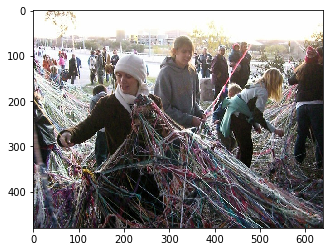

In [0]:
ind = 99
img_name = person_images_boxable['ImageID'][ind]
img_url = person_images_boxable['Thumbnail300KURL'][ind]
img = io.imread(img_url)
print('The shape of the image is: ', img.shape)

plt.imshow(img)

Let us prepare the car data first:

In [0]:
class_description[class_description['name']=='/m/050k8']

,name,class
312,/m/050k8,Mobile phone


(176, 72, 3)
(33, 15, 3)


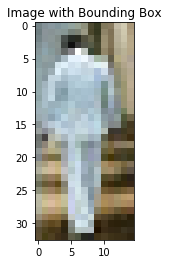

In [0]:
height, width, _ = img.shape
img_id = img_name[:16]
bboxs = annotations_bbox[annotations_bbox['ImageID']==img_id]
img_bbox = img.copy()

set_of_images = []
for index, row in bboxs.iterrows():
    xmin = row['XMin']
    xmax = row['XMax']
    ymin = row['YMin']
    ymax = row['YMax']
    xmin = int(xmin*width)
    xmax = int(xmax*width)
    ymin = int(ymin*height)
    ymax = int(ymax*height)
    label_name = row['LabelName']
    if label_name == '/m/01g317':
      class_series = class_description[class_description['name']==label_name]
      class_name = class_series['class'].values[0]
      new_image = img_bbox[ymin:ymax , xmin:xmax]
      print(new_image.shape)
plt.title('Image with Bounding Box')
plt.imshow(new_image)
plt.show()


The label name for :
1. car = /m/0k4j
2. Person = /m/01g317
3. Mobile phone = /m/050k8

For the first architecture:

1. 1 = object
2. 0 = not object

For the second archutecture:

1. 0 = Not object
2. 1 = Car
3. 2 = Person
4. 3 = Mobile Phone


Now let us write the code to make array of these images

Let us make array of x_car and y_car=1

In [0]:
dim=(256,256)
x_car = []
counter = 0



for ind in tqdm(range(100)):
  if ind!=60 and ind!=80 and ind!=84:
    img_name = car_images_boxable['ImageID'][ind]
    img_url = car_images_boxable['Thumbnail300KURL'][ind]
    try:
      img = io.imread(img_url)
      height, width, _ = img.shape
      img_id = img_name[:16]
      bboxs = annotations_bbox[annotations_bbox['ImageID']==img_id]
      img_bbox = img.copy()
      for index, row in bboxs.iterrows():
          xmin = row['XMin']
          xmax = row['XMax']
          ymin = row['YMin']
          ymax = row['YMax']
          xmin = int(xmin*width)
          xmax = int(xmax*width)
          ymin = int(ymin*height)
          ymax = int(ymax*height)
          label_name = row['LabelName']
          if label_name == '/m/0k4j':
            class_series = class_description[class_description['name']==label_name]
            class_name = class_series['class'].values[0]
            new_image = img_bbox[ymin:ymax , xmin:xmax]
            resized = cv2.resize(new_image, dim)
            resized = np.reshape(resized,(1, 256, 256,3))
            if counter == 0:
              x_car = resized
            else:
              x_car = np.concatenate((x_car, resized), axis=0)
            counter+=1
    except urllib.error.URLError or IOError:
      pass

In [0]:
y_car = [1 for i in range(len(x_car))]

Let us make array x_person and y_person = 2

In [0]:
dim=(256,256)
x_person = []
counter = 0



for ind in tqdm(range(100)):
  if ind!=1 and ind!=52 and ind!=19 and ind!=77:
    img_name = person_images_boxable['ImageID'][ind]
    img_url = person_images_boxable['Thumbnail300KURL'][ind]
    try:
      img = io.imread(img_url)
      height, width, _ = img.shape
      img_id = img_name[:16]
      bboxs = annotations_bbox[annotations_bbox['ImageID']==img_id]
      img_bbox = img.copy()
      for index, row in bboxs.iterrows():
          xmin = row['XMin']
          xmax = row['XMax']
          ymin = row['YMin']
          ymax = row['YMax']
          xmin = int(xmin*width)
          xmax = int(xmax*width)
          ymin = int(ymin*height)
          ymax = int(ymax*height)
          label_name = row['LabelName']
          if label_name == '/m/01g317':
            class_series = class_description[class_description['name']==label_name]
            class_name = class_series['class'].values[0]
            new_image = img_bbox[ymin:ymax , xmin:xmax]
            resized = cv2.resize(new_image, dim)
            resized = np.reshape(resized,(1, 256, 256,3))
            if counter == 0:
              x_person = resized
            else:
              x_person = np.concatenate((x_person, resized), axis=0)
            counter+=1
    except urllib.error.URLError or IOError:
      pass

In [0]:
y_person = [2 for i in range(len(x_person))]

In [0]:
dim=(256,256)
x_phone = []
counter = 0



for ind in tqdm(range(100)):
  if ind!=46 and ind!=71 and ind!=93 and ind!=200:
    img_name = phone_images_boxable['ImageID'][ind]
    img_url = phone_images_boxable['Thumbnail300KURL'][ind]
    try:
      img = io.imread(img_url)
      height, width, _ = img.shape
      img_id = img_name[:16]
      bboxs = annotations_bbox[annotations_bbox['ImageID']==img_id]
      img_bbox = img.copy()
      for index, row in bboxs.iterrows():
          xmin = row['XMin']
          xmax = row['XMax']
          ymin = row['YMin']
          ymax = row['YMax']
          xmin = int(xmin*width)
          xmax = int(xmax*width)
          ymin = int(ymin*height)
          ymax = int(ymax*height)
          label_name = row['LabelName']
          if label_name == '/m/050k8':
            class_series = class_description[class_description['name']==label_name]
            class_name = class_series['class'].values[0]
            new_image = img_bbox[ymin:ymax , xmin:xmax]
            resized = cv2.resize(new_image, dim)
            resized = np.reshape(resized,(1, 256, 256,3))
            if counter == 0:
              x_phone = resized
            else:
              x_phone = np.concatenate((x_phone, resized), axis=0)
            counter+=1
    except urllib.error.URLError or IOError:
      pass

In [0]:
y_phone = [3 for i in range(len(x_phone))]

In [0]:
#let us how much of images of each example we have
print('The number of car images are', len(x_car))
print('The number of phone images are', len(x_phone))
print('The number of person images are ', len(x_person))
print('The number of object images are ',len(x_car) + len(x_phone) + len(x_person))


The number of car images are 224
The number of phone images are 117
The number of person images are  281
The number of object images are  622


Let us create 400 images of not objects

In [0]:
ind = 10
img_name = car_images_boxable['ImageID'][ind]
img_url = car_images_boxable['Thumbnail300KURL'][ind]
img = io.imread(img_url)
print('The shape of the image is: ', img.shape)

img_lbl, regions = selectivesearch.selective_search(img, scale=100, sigma=0.9, min_size=20)

for i in range(len(regions)):
  if regions[i]['size']<30:
    (x,y,width,height) = regions[i]['rect']
    xmin = x
    ymin = y
    xmax = x + width
    ymax = y + height
    new_image = img[ymin:ymax , xmin:xmax]
    resized = cv2.resize(new_image, dim)
    break

The shape of the image is:  (377, 566, 3)


In [0]:
counter = 0
x_none = []


for ind in tqdm(range(100)):
  if ind!=60 and ind!=80 and ind!=84 and ind!=15:
    img_name = car_images_boxable['ImageID'][ind]
    img_url = car_images_boxable['Thumbnail300KURL'][ind]
    try:
      img = io.imread(img_url)
      # print('The shape of the image is: ', img.shape)

      img_lbl, regions = selectivesearch.selective_search(img, scale=100, sigma=0.9, min_size=20)

      for i in range(len(regions)):
        if regions[i]['size']>=20 and regions[i]['size']<=50:
          (x,y,width,height) = regions[i]['rect']
          xmin = x
          ymin = y
          xmax = x + width
          ymax = y + height
          new_image = img[ymin:ymax , xmin:xmax]
          a,b,c = new_image.shape
          if a!=0 and b!=0:
            resized = cv2.resize(new_image, dim)
            resized = np.reshape(resized,(1, 256, 256,3))
            if counter == 0:
              x_none = resized
            else:
              x_none = np.concatenate((x_none, resized), axis=0)
            counter+=1
            break
    except urllib.error.URLError or IOError:
      pass  


for ind in tqdm(range(100)):
  if ind!=1 and ind!=52 and ind!=19 and ind!=77:
    img_name = person_images_boxable['ImageID'][ind]
    img_url = person_images_boxable['Thumbnail300KURL'][ind]
    try:
      img = io.imread(img_url)
      # print('The shape of the image is: ', img.shape)

      img_lbl, regions = selectivesearch.selective_search(img, scale=100, sigma=0.9, min_size=20)

      for i in range(len(regions)):
        if regions[i]['size']>=20 and regions[i]['size']<=50:
          (x,y,width,height) = regions[i]['rect']
          xmin = x
          ymin = y
          xmax = x + width
          ymax = y + height
          new_image = img[ymin:ymax , xmin:xmax]
          a,b,c = new_image.shape
          if a!=0 and b!=0:
            resized = cv2.resize(new_image, dim)
            resized = np.reshape(resized,(1, 256, 256,3))
            if counter == 0:
              x_none = resized
            else:
              x_none = np.concatenate((x_none, resized), axis=0)
            counter+=1
            break
    except urllib.error.URLError or IOError:
      pass  

for ind in tqdm(range(100)):
  if ind!=46 and ind!=71 and ind!=93 and ind!=200:
    img_name = phone_images_boxable['ImageID'][ind]
    img_url = phone_images_boxable['Thumbnail300KURL'][ind]
    try:
      img = io.imread(img_url)
      # print('The shape of the image is: ', img.shape)

      img_lbl, regions = selectivesearch.selective_search(img, scale=100, sigma=0.9, min_size=20)

      for i in range(len(regions)):
        if regions[i]['size']>=20 and regions[i]['size']<=50:
          (x,y,width,height) = regions[i]['rect']
          xmin = x
          ymin = y
          xmax = x + width
          ymax = y + height
          new_image = img[ymin:ymax , xmin:xmax]
          a,b,c = new_image.shape
          if a!=0 and b!=0:
            resized = cv2.resize(new_image, dim)
            resized = np.reshape(resized,(1, 256, 256,3))
            if counter == 0:
              x_none = resized
            else:
              x_none = np.concatenate((x_none, resized), axis=0)
            counter+=1
            break
    except urllib.error.URLError or IOError:
      pass  


In [0]:
y_none = [0 for i in range(len(x_none))]
len(y_none)

259

In [0]:
X = np.concatenate((x_car , x_person), axis = 0)
Y_net2 = np.concatenate((y_car , y_person), axis = 0)

X = np.concatenate((X , x_phone), axis = 0)
print(X.shape)
Y_net2 = np.concatenate((Y_net2 , y_phone), axis = 0)

X = np.concatenate((X , x_none), axis = 0)
Y_net2 = np.concatenate((Y_net2 , y_none), axis = 0)



(622, 256, 256, 3)


In [0]:
Y_object = [1 for i in range(622)]
Y_not_object = [0 for i in range(259)]
Y_net1 = np.concatenate((Y_object , Y_not_object), axis = 0)

In [0]:
np.save(path_drive + 'X.npy',X)
np.save(path_drive +'Y_net1.npy',Y_net1)
np.save(path_drive +'Y_net2.npy',Y_net2)

0 0


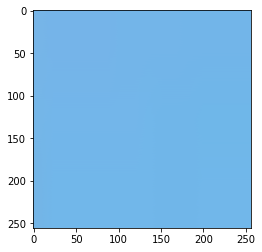

In [0]:
i=700
plt.imshow(X[i])
print(Y_net1[i], Y_net2[i])
